In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')

df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [41]:
# Check for missing values

missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [42]:
# Fill missing values for none-existence categories

cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','MasVnrType','FireplaceQu']
for col in cols:
    df[col] = df[col].fillna('None')

bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in bsmt_cols:
    df[col] = df[col].fillna('None')

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])  

# Verify no missing values remain

df.isnull().sum().sum()   

np.int64(0)

In [43]:
# Analyze correlations with SalePrice
corr = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(corr.head(10))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


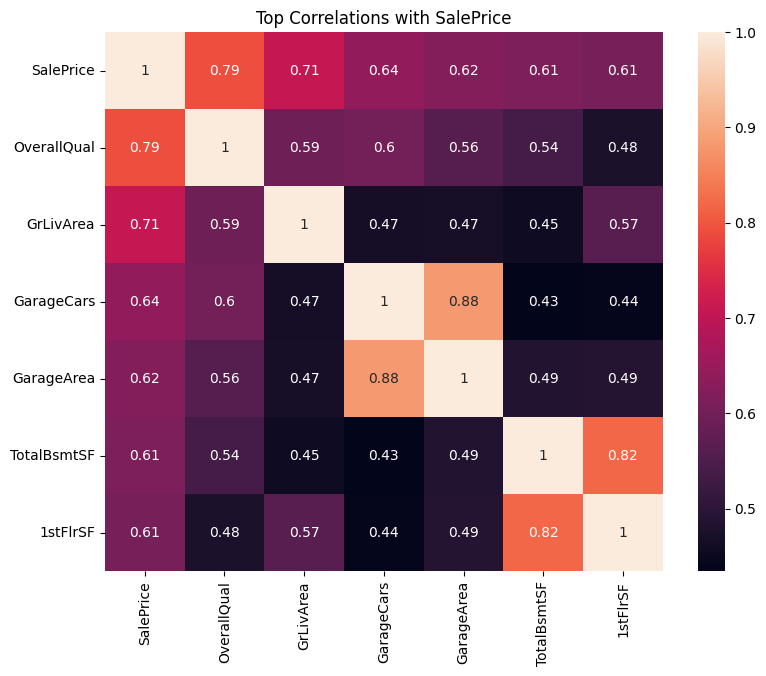

In [44]:
# Visualize top correlations
top_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
plt.figure(figsize=(9,7))
sns.heatmap(df[top_features].corr(), annot=True)
plt.title('Top Correlations with SalePrice')
plt.show()

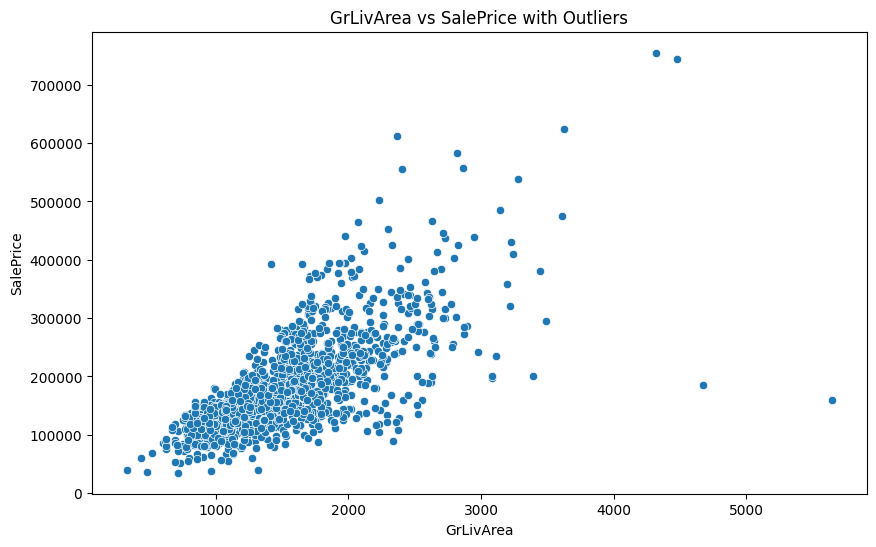

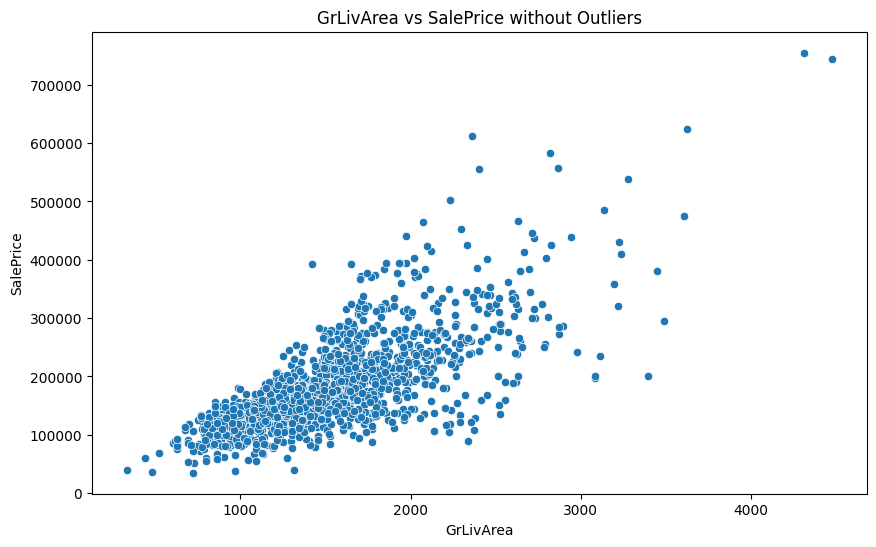

In [45]:
# Visualize GrLivArea vs SalePrice to identify outliers
plt.figure(figsize=(10,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice with Outliers')
plt.show()

# Remove outliers based on 'GrLivArea'
df = df[df['GrLivArea'] < 4500].copy()
plt.figure(figsize=(10,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice without Outliers')
plt.show()

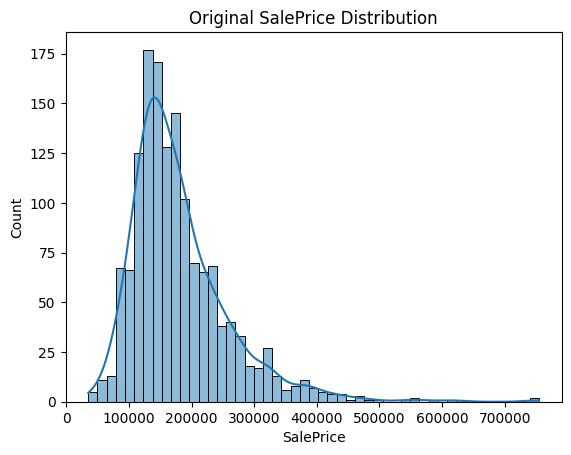

In [50]:
# Check distribution of SalePrice
sns.histplot(x=df['SalePrice'], kde=True)
plt.title('Original SalePrice Distribution')
plt.show()

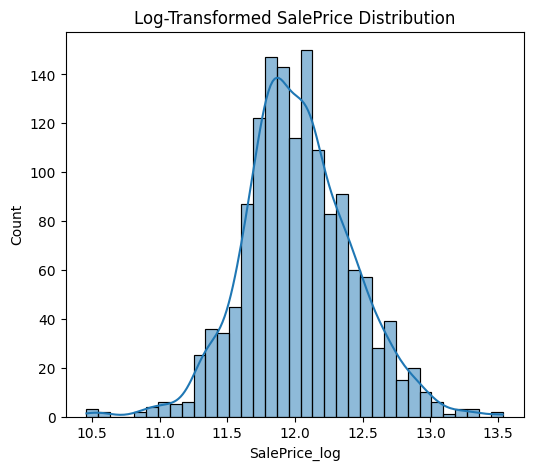

In [ ]:
# Log-transform the target variable 'SalePrice' to reduce skewness

df['SalePrice_log'] = np.log1p(df['SalePrice'])

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice_log'], kde=True)
plt.title('Log-Transformed SalePrice Distribution')

plt.show()